In [121]:
#imports

import torch
from torch.autograd import Variable

#import os
#from pyrednet import PredNet
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader


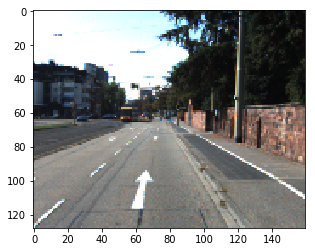

In [134]:

# from Lotter: train_generator = SequenceGenerator(train_file, train_sources, nt, batch_size=batch_size, shuffle=True)

DATA_DIR = './kitti_data/'
#train_file = os.path.join(DATA_DIR, 'X_train.hkl')
#train_sources = os.path.join(DATA_DIR, 'sources_train.p')
train_file_pkl = './kitti_data/X_train.p'
train_source_pkl = './kitti_data/sources_train.p'
nt = 10  # number of timesteps used for sequences in training

class KittiDataset(Dataset): 
    def __init__(self, data_file, source_file, nt, transform=None, output_mode='error'):
        
        """
        Args:
            data_file (string): Path to the hickle file with dimensions (n_imgs, height, width, num channels)
                                                        for train_file: (41396, 128, 160, 3)
            source_file (string): hickle file of list with all the images, with length n_imgs
            transform (callable, optional): Optional transform to be applied
                on a sample.
            nt: number of timesteps for sequences in training
            # do we need to consider channels first/last?
        """

        self.X = pkl.load(open(data_file, 'rb'))
        self.sources = pkl.load(open(source_file, 'rb'))
        self.nt = nt
        
        self.possible_starts = np.array([i for i in range(self.X.shape[0] - self.nt) if self.sources[i] == self.sources[i + self.nt - 1]])
        
    def __len__(self):
        return len(self.possible_starts)

    
    # DEFINE AN EXAMPLE AS NT TIMESTEPS OF A SEQUENCE
    def __getitem__(self, idx):
        
        sample = self.X[idx:idx+nt,:,:,:]
        return sample.astype(np.float32) / 255


    
    
dataset = KittiDataset(train_file_pkl, train_source_pkl, nt)

fig = plt.figure()
# for x in range(1,5):
img = dataset[156][4]
#     a=fig.add_subplot(1,4,x)
#     #ax = plt.subplot(1, 3, x + 1)
#     #plt.tight_layout()
plt.imshow(img)
    

# print(len(dataset.possible_starts))


In [118]:
batch_size=4
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=3)
for i, data in enumerate(loader):
    data = torch.transpose(data, 2, 4)
    data = torch.transpose(data, 3, 4)
    print(i, data.shape)

0 torch.Size([4, 10, 3, 128, 160])
1 torch.Size([4, 10, 3, 128, 160])
2 torch.Size([4, 10, 3, 128, 160])
3 torch.Size([4, 10, 3, 128, 160])
4 torch.Size([4, 10, 3, 128, 160])
5 torch.Size([4, 10, 3, 128, 160])
6 torch.Size([4, 10, 3, 128, 160])
7 torch.Size([4, 10, 3, 128, 160])
8 torch.Size([4, 10, 3, 128, 160])
9 torch.Size([4, 10, 3, 128, 160])
10 torch.Size([4, 10, 3, 128, 160])
11 torch.Size([4, 10, 3, 128, 160])
12 torch.Size([4, 10, 3, 128, 160])
13 torch.Size([4, 10, 3, 128, 160])
14 torch.Size([4, 10, 3, 128, 160])
15 torch.Size([4, 10, 3, 128, 160])
16 torch.Size([4, 10, 3, 128, 160])
17 torch.Size([4, 10, 3, 128, 160])
18 torch.Size([4, 10, 3, 128, 160])
19 torch.Size([4, 10, 3, 128, 160])
20 torch.Size([4, 10, 3, 128, 160])
21 torch.Size([4, 10, 3, 128, 160])
22 torch.Size([4, 10, 3, 128, 160])
23 torch.Size([4, 10, 3, 128, 160])
24 torch.Size([4, 10, 3, 128, 160])
25 torch.Size([4, 10, 3, 128, 160])
26 torch.Size([4, 10, 3, 128, 160])
27 torch.Size([4, 10, 3, 128, 160])
28

In [ ]:

lossfn = torch.nn.L1Loss()
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [ ]:
class Prediction(nn.Module):
    """Prediction (Ahat) module
    
    
    
    """
    def __init__(self, layer, outputChannels, filterSize):
        self.layer = layer
        self.conv = nn.Conv2d(inputChannels, outputChannels, filterSize)
        
class Representation(nn.Module):
    """Representation (R) module
    
    A ConvLSTM (https://arxiv.org/pdf/1506.04214.pdf) unit.
    
    """
    def __init__(self, layer, stackSize, filterSizes):
        pass

class Target(nn.Module):
    """Target (A) module
    Equals:
    input (x) if layer = 0
    MaxPool(ReLU(Conv(input))) if layer > 0 
    """
    def __init(self, layer, stackSize, filterSize):
        self.layer = layer
        self.conv = nn.Conv2d(stackSize, filterSize)

class Error(nn.Module):
    pass
        
class PredNetLayer(nn.Module):
    """Single Layer of the prednet architechture"""
    pass

class PredNet(nn.Module):
    """Full stack of layers in the prednet architecture"""
    def __init__(self, layers):
        """Takes a list of prednet layers and combines them"""
        pass